# Display objects

A `striplog` depends on a hierarchy of objects. This notebook shows the objects related to display:

- [Decor](#Decor): One element from a legend — describes how to display a Rock.
- [Legend](#Legend): A set of Decors — describes how to display a set of Rocks or a Striplog.

<hr />

## Decor

In [1]:
from striplog import Decor

A Decor attaches a display style to a Rock. 

In [2]:
print(Decor.__doc__)


    A single display style. A Decor describes how to display a given set
    of Component properties.

    In general, you will not usually use a Decor on its own. Instead, you
    will want to use a Legend, which is just a list of Decors, and leave
    the Decors to the Legend.

    Args:
      params (dict): The parameters you want in the Decor. There must be a
        Component to attach the decoration to, and at least 1 other attribute.
        It's completely up to you, but you probably want at least a colour
        (hex names like #AAA or #d3d3d3, or matplotlib's English-language
        names listed at http://ageo.co/modelrcolour are acceptable.

        The only other parameter the class recognizes for now is 'width',
        which is the width of the striplog element.

    Example:
      my_rock = Component({ ... })
      d = {'component': my_rock, 'colour': 'red'}
      my_decor = Decor(d)
    


We are going to need a `Component` to make a `Decor`.

In [3]:
from striplog import Component
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand',
     'porosity': 0.123
    }
rock = Component(r)
rock

grainsize,vf-f
lithology,sand
colour,grey
porosity,0.123


In [4]:
d = {'color': '#267022',
     'component': rock,
     'width': 3}
decor = Decor(d)
decor

Decor({'_colour': '#267022', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sand', 'colour': 'grey', 'porosity': 0.123}), 'hatch': None, 'width': 3.0})

In [5]:
from striplog import Component
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand',
     'porosity': 0.123
    }
rock = Component(r)
rock

grainsize,vf-f
lithology,sand
colour,grey
porosity,0.123


Like `Rock`s, we instantiate `Decor`s with a `dict` of properties:

In [6]:
d = {'color': '#267022',
     'component': rock,
     'width': 3}
decor = Decor(d)
decor

Decor({'_colour': '#267022', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sand', 'colour': 'grey', 'porosity': 0.123}), 'hatch': None, 'width': 3.0})

Or instantiate with keyword parameters:

In [7]:
Decor(colour='#86f0b6', component=Component({'colour': 'grey', 'grainsize': 'vf-f', 'porosity': 0.123, 'lithology': 'sand'}), width=3.0)

Decor({'_colour': '#86f0b6', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sand', 'colour': 'grey', 'porosity': 0.123}), 'hatch': None, 'width': 3.0})

You can access its attributes. It has two ways to understand colour:

In [8]:
print("Hex: {}... and RGB: {}".format(decor.colour, decor.rgb))

Hex: #267022... and RGB: (38, 112, 34)


In [9]:
print(decor)

Decor({'_colour': '#267022', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sand', 'colour': 'grey', 'porosity': 0.123}), 'hatch': None, 'width': 3.0})


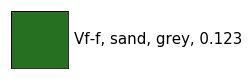

In [10]:
%matplotlib inline
decor.plot()

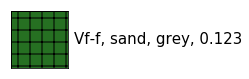

In [11]:
decor.hatch = '+'
decor.plot()

There are the standard `matplotlib` hatch patterns:

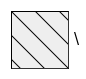

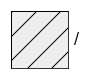

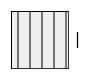

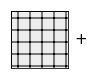

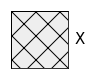

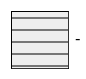

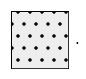

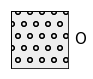

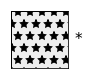

In [12]:
hatches = "\/|+x-.o*"
for h in hatches:
    Decor({'component': Component({'hatch':h}), 'hatch': h, 'colour': '#eeeeee'}).plot()

And there are some custom ones. These really need to be reconciled and implemented in a more flexible way, perhaps even going as far as a redesign of the mpl implementation.

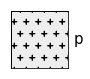

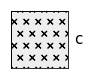

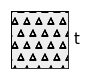

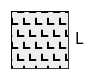

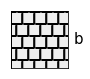

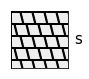

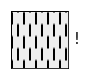

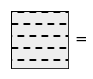

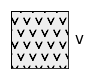

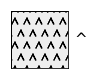

In [13]:
hatches = "pctLbs!=v^"
for h in hatches:
    Decor({'component': Component({'hatch':h}), 'hatch': h, 'colour': '#eeeeee'}).plot(fmt="{hatch}")

<hr />

## Legend

In [14]:
from striplog import Legend
print(Legend.__doc__)


    A look-up table to assist in the conversion of Components to
    a plot colour.

    Args:
        list_of_Decors (list): The decors to collect into a legend. In
            general, you will want to leave legend building to the constructor
            class methods, `Legend.default()`, and
            `Legend.from_csv(text=string)`. We can add others over time, such
            as `from_xls` and so on.
    


We'll define a legend in a CSV file. I can't think of a better way for now. It would be easy to make a web form to facilitate this with, for example, a colour picker. It may not be worth it, though; I imagine one would create one and then leave it alone most of the time. 

In [15]:
l = u"""colour, width, component lithology, component colour, component grainsize
#F7E9A6, 3, Sandstone, Grey, VF-F
#FF99CC, 2, Anhydrite, , 
#DBD6BC, 3, Heterolithic, Grey, 
#FF4C4A, 2, Volcanic, , 
#86F0B6, 5, Conglomerate, , 
#FF96F6, 2, Halite, , 
#F2FF42, 4, Sandstone, Grey, F-M
#DBC9BC, 3, Heterolithic, Red, 
#A68374, 2, Siltstone, Grey, 
#A657FA, 3, Dolomite, , 
#FFD073, 4, Sandstone, Red, C-M
#A6D1FF, 3, Limestone, , 
#FFDBBA, 3, Sandstone, Red, VF-F
#FFE040, 4, Sandstone, Grey, C-M
#A1655A, 2, Siltstone, Red, 
#363434, 1, Coal, , 
#664A4A, 1, Mudstone, Red, 
#666666, 1, Mudstone, Grey, """

In [16]:
legend = Legend.from_csv(text=l)
legend[:5]

Legend(Decor({'_colour': '#f7e9a6', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sandstone', 'colour': 'grey'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ff99cc', 'component': Component({'lithology': 'anhydrite'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#dbd6bc', 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'volcanic'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'conglomerate'}), 'hatch': None, 'width': 5.0}))

Duplicate lithologies will result in a warning. To avoid strange results, you should fix the problem by removing duplicates.

In [17]:
l = u"""colour, component lithology
#F7E9A6, Sandstone
#F2FF42, Sandstone
#FF99CC, Anhydrite
#DBD6BC, Heterolithic 
#FF4C4A, Volcanic
#86F0B6, Conglomerate
#FFD073, Sandstone
"""

In [18]:
Legend.from_csv(text=l)

/Users/matt/anaconda/envs/temp9/lib/python3.5/site-packages/striplog/legend.py:621: UserWarning: This legend contains duplicate components.
  warnings.warn(w)
/Users/matt/anaconda/envs/temp9/lib/python3.5/site-packages/striplog/legend.py:621: UserWarning: This legend contains duplicate components.
  warnings.warn(w)


Legend(Decor({'_colour': '#f7e9a6', 'component': Component({'lithology': 'sandstone'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f2ff42', 'component': Component({'lithology': 'sandstone'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ff99cc', 'component': Component({'lithology': 'anhydrite'}), 'hatch': None, 'width': None})
Decor({'_colour': '#dbd6bc', 'component': Component({'lithology': 'heterolithic '}), 'hatch': None, 'width': None})
Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'volcanic'}), 'hatch': None, 'width': None})
Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'conglomerate'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffd073', 'component': Component({'lithology': 'sandstone'}), 'hatch': None, 'width': None}))

We can also export a legend as CSV text:

In [19]:
print(legend.to_csv())

colour,hatch,width,component grainsize,component lithology,component colour
#f7e9a6,None,3.0,vf-f,sandstone,grey,
#ff99cc,None,2.0,,anhydrite,,
#dbd6bc,None,3.0,,heterolithic,grey,
#ff4c4a,None,2.0,,volcanic,,
#86f0b6,None,5.0,,conglomerate,,
#ff96f6,None,2.0,,halite,,
#f2ff42,None,4.0,f-m,sandstone,grey,
#dbc9bc,None,3.0,,heterolithic,red,
#a68374,None,2.0,,siltstone,grey,
#a657fa,None,3.0,,dolomite,,
#ffd073,None,4.0,c-m,sandstone,red,
#a6d1ff,None,3.0,,limestone,,
#ffdbba,None,3.0,vf-f,sandstone,red,
#ffe040,None,4.0,c-m,sandstone,grey,
#a1655a,None,2.0,,siltstone,red,
#363434,None,1.0,,coal,,
#664a4a,None,1.0,,mudstone,red,
#666666,None,1.0,,mudstone,grey,



## Builtin legends

There are several: 

    'nsdoe': Nova Scotia Dept. of Energy
    'nagmdm__6_2': USGS N. Am. Geol. Map Data Model 6.2 <<< default
    'nagmdm__6_1': USGS N. Am. Geol. Map Data Model 6.1
    'nagmdm__4_3': USGS N. Am. Geol. Map Data Model 4.3
    'sgmc': USGS State Geologic Map Compilation

In [21]:
legend = Legend.builtin('nsdoe')
legend

Legend(Decor({'_colour': '#f7e9a6', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sandstone', 'colour': 'grey'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ff99cc', 'component': Component({'lithology': 'anhydrite'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#dbd6bc', 'component': Component({'lithology': 'heterolithic', 'colour': 'grey'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'volcanic'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'conglomerate'}), 'hatch': None, 'width': 5.0})
Decor({'_colour': '#ff96f6', 'component': Component({'lithology': 'halite'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#f2ff42', 'component': Component({'grainsize': 'f-m', 'lithology': 'sandstone', 'colour': 'grey'}), 'hatch': None, 'width': 4.0})
Decor({'_colour': '#dbc9bc', 'component': Component({'lithology': 'heterolithic', 'colour': 'red'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#a68374', 'component': Component({'lithology': 'siltstone', 'colour': 'grey'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#a657fa', 'component': Component({'lithology': 'dolomite'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ffd073', 'component': Component({'grainsize': 'c-m', 'lithology': 'sandstone', 'colour': 'red'}), 'hatch': None, 'width': 4.0})
Decor({'_colour': '#a6d1ff', 'component': Component({'lithology': 'limestone'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ffdbba', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sandstone', 'colour': 'red'}), 'hatch': None, 'width': 3.0})
Decor({'_colour': '#ffe040', 'component': Component({'grainsize': 'c-m', 'lithology': 'sandstone', 'colour': 'grey'}), 'hatch': None, 'width': 4.0})
Decor({'_colour': '#a1655a', 'component': Component({'lithology': 'siltstone', 'colour': 'red'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#363434', 'component': Component({'lithology': 'coal'}), 'hatch': None, 'width': 1.0})
Decor({'_colour': '#664a4a', 'component': Component({'lithology': 'mudstone', 'colour': 'red'}), 'hatch': None, 'width': 1.0})
Decor({'_colour': '#666666', 'component': Component({'lithology': 'mudstone', 'colour': 'grey'}), 'hatch': None, 'width': 1.0}))

There is also a default legend, which you can call with `Legend.default()` (no arguments).

In [22]:
Legend.default()

Legend(Decor({'_colour': '#fdf43f', 'component': Component({'lithology': 'unconsolidated material'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffff89', 'component': Component({'lithology': 'alluvium'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffffd5', 'component': Component({'lithology': 'flood plain'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fffae9', 'component': Component({'lithology': 'levee'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fffac8', 'component': Component({'lithology': 'delta'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffffb7', 'component': Component({'lithology': 'alluvial fan'}), 'hatch': None, 'width': None})
Decor({'_colour': '#faee7a', 'component': Component({'lithology': 'alluvial terrace'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f4efe4', 'component': Component({'lithology': 'lake or marine sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f1e5df', 'component': Component({'lithology': 'playa'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e4d0be', 'component': Component({'lithology': 'mud flat'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e4d8be', 'component': Component({'lithology': 'beach sand'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fff6d9', 'component': Component({'lithology': 'terrace'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e0c59e', 'component': Component({'lithology': 'eolian material'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e0d2b4', 'component': Component({'lithology': 'dune sand'}), 'hatch': None, 'width': None})
Decor({'_colour': '#dbcca9', 'component': Component({'lithology': 'sand sheet'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f5e1bd', 'component': Component({'lithology': 'loess'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e0b09e', 'component': Component({'lithology': 'volcanic ash'}), 'hatch': None, 'width': None})
Decor({'_colour': '#cfbb8f', 'component': Component({'lithology': 'mass wasting material'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e1e3c3', 'component': Component({'lithology': 'colluvium'}), 'hatch': None, 'width': None})
Decor({'_colour': '#e5dbb3', 'component': Component({'lithology': 'mudflow'}), 'hatch': None, 'width': None})
Decor({'_colour': '#dcd5b4', 'component': Component({'lithology': 'lahar'}), 'hatch': None, 'width': None})
Decor({'_colour': '#d3ca9f', 'component': Component({'lithology': 'debris flow'}), 'hatch': None, 'width': None})
Decor({'_colour': '#c9be89', 'component': Component({'lithology': 'landslide'}), 'hatch': None, 'width': None})
Decor({'_colour': '#bcaf6c', 'component': Component({'lithology': 'talus'}), 'hatch': None, 'width': None})
Decor({'_colour': '#bfa743', 'component': Component({'lithology': 'glacial drift'}), 'hatch': None, 'width': None})
Decor({'_colour': '#d2c27c', 'component': Component({'lithology': 'till'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffeebf', 'component': Component({'lithology': 'moraine'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffe59d', 'component': Component({'lithology': 'stratified glacial sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffdf85', 'component': Component({'lithology': 'glacial outwash sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fee670', 'component': Component({'lithology': 'sub/supra-glacial sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fee258', 'component': Component({'lithology': 'glaciolacustrine sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fedb2e', 'component': Component({'lithology': 'glacial-marine sediment'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f7f3a1', 'component': Component({'lithology': 'biogenic rock'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffcf81', 'component': Component({'lithology': 'peat'}), 'hatch': None, 'width': None})
Decor({'_colour': '#ffcc99', 'component': Component({'lithology': 'coral'}

There are also default timescales:

In [23]:
time = Legend.default_timescale()
time[:10]

Legend(Decor({'_colour': '#6fdaed', 'component': Component({'age': 'phanerozoic'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f6ec39', 'component': Component({'age': 'cenozoic'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fef691', 'component': Component({'age': 'quaternary'}), 'hatch': None, 'width': None})
Decor({'_colour': '#f2f902', 'component': Component({'age': 'tertiary'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fedd2d', 'component': Component({'age': 'neogene'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fef1e0', 'component': Component({'age': 'holocene'}), 'hatch': None, 'width': None})
Decor({'_colour': '#feefb8', 'component': Component({'age': 'pleistocene'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fef1d6', 'component': Component({'age': 'upper pleistocene'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fef1d6', 'component': Component({'age': 'tarantian'}), 'hatch': None, 'width': None})
Decor({'_colour': '#fef0cc', 'component': Component({'age': 'middle pleistocene'}), 'hatch': None, 'width': None}))

## Legend from image

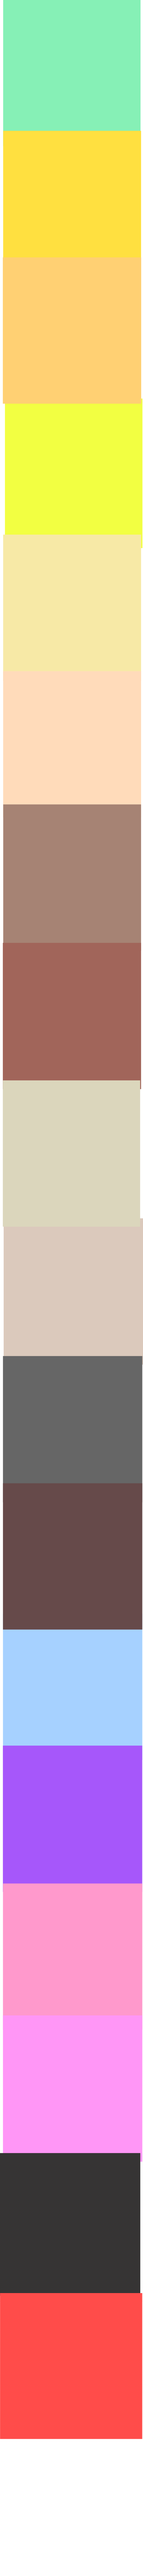

In [24]:
from IPython.display import Image
Image('z_Lithology_legend_gapless2.png', width=15)

In [25]:
liths = [
'Conglomerate', 
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Sandstone',
'Siltstone',
'Siltstone',
'Heterolithic',
'Heterolithic',
'Mudstone',
'Mudstone',
'Limestone',
'Dolomite',
'Anhydrite',
'Halite',
'Coal',
'Volcanic',
'NULL',
]

colours = [
None, 
'Grey',
'Red',
'Grey',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
'Grey',
'Red',
None, 
None, 
None, 
None, 
None, 
None, 
None, 
]

In [26]:
components = [Component({'lithology': l, 'colour': c}) for l, c in zip(liths, colours)]

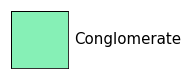

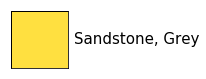

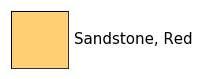

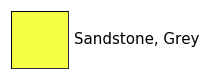

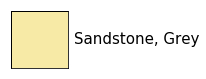

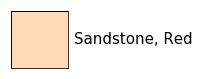

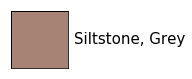

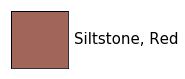

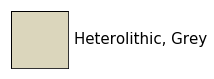

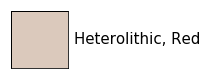

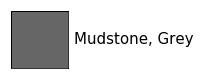

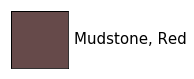

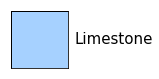

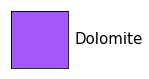

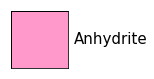

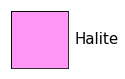

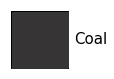

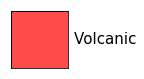

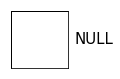

In [27]:
Legend.from_image('z_Lithology_legend_gapless2.png', components).plot()

## Querying a legend

The legend is basically a query table. We can ask the Legend what colour to use for a given Rock object:

In [28]:
legend.get_colour(rock)

'#eeeeee'

In [29]:
rock3 = Component({'colour': 'red',
           'grainsize': 'vf-f',
           'lithology': 'sandstone'})
legend.get_colour(rock3)

'#ffdbba'

In [30]:
Legend.random(rock3)

Legend(Decor({'_colour': '#7a8dd9', 'component': Component({'grainsize': 'vf-f', 'lithology': 'sandstone', 'colour': 'red'}), 'hatch': None, 'width': None}))

Sometimes we also want to use a width for a given lithology:

In [31]:
legend.get_width(rock3)

3.0

We can also ask the legend which Rock is represented by a particular colour. (I doubt you'd ever really need to do this, but I had to implement this to allow you to make a `Striplog` from an image: it looks up the rocks to use by colour.)

In [32]:
legend.get_component('#f7e9a6')

grainsize,vf-f
lithology,sandstone
colour,grey


The `Legend` behaves more or less like a list, so we can index into it:

In [33]:
legend[3:5]

Legend(Decor({'_colour': '#ff4c4a', 'component': Component({'lithology': 'volcanic'}), 'hatch': None, 'width': 2.0})
Decor({'_colour': '#86f0b6', 'component': Component({'lithology': 'conglomerate'}), 'hatch': None, 'width': 5.0}))

`Legend`s can plot themselves. 

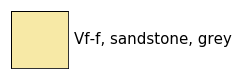

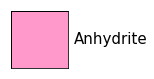

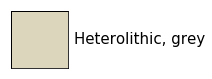

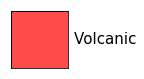

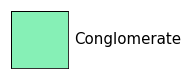

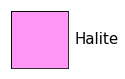

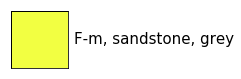

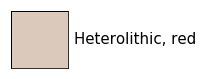

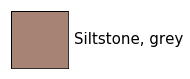

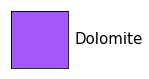

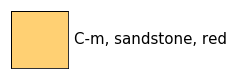

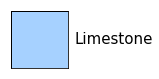

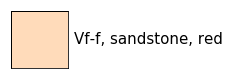

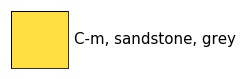

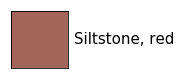

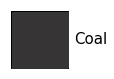

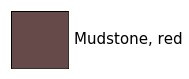

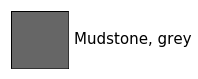

In [34]:
legend.plot()

Sometimes you don't want to have to make a legend, so you can use a random one. Just pass a list of `Component`s...

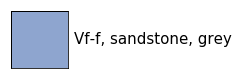

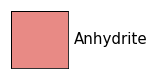

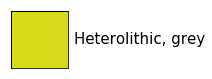

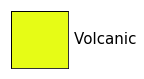

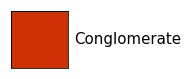

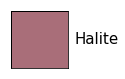

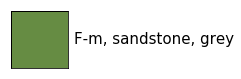

In [35]:
# We'll scrape a quick list of 7 components from the default legend:
c = [d.component for d in legend[:7]]

l = Legend.random(c)
l.plot()

There is a default colour table for geological timescales too... it's based on the Wikipedia's colour scheme for the geological timetable. 

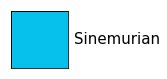

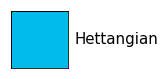

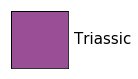

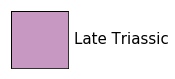

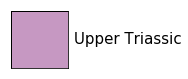

In [36]:
time[74:79].plot(fmt="{age!t}")  # Pass a format for proper case

## Hatch patterns

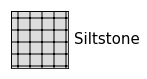

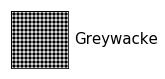

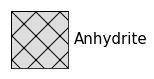

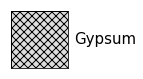

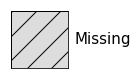

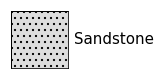

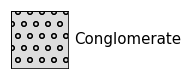

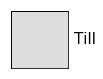

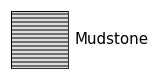

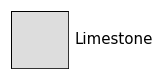

In [38]:
hatchy = """colour,width,hatch,component colour,component grainsize,component lithology
#dddddd,1,+,,,siltstone,
#dddddd,1,+++,,,greywacke,
#dddddd,2,x,,,anhydrite,
#dddddd,2,xxx,,,gypsum,
#dddddd,3,/,,,missing,
#dddddd,4,..,,,sandstone,
#dddddd,5,o,,,conglomerate,
#dddddd,5,0,,,till,
#dddddd,6,---,,,mudstone,
#dddddd,7,,,,limestone,
"""
Legend.from_csv(text=hatchy).plot()

## Bugs

### Decor plots with axes

These should plot as square patches, not rectangles. The text actually flows off the right-hand edge of the plot. 

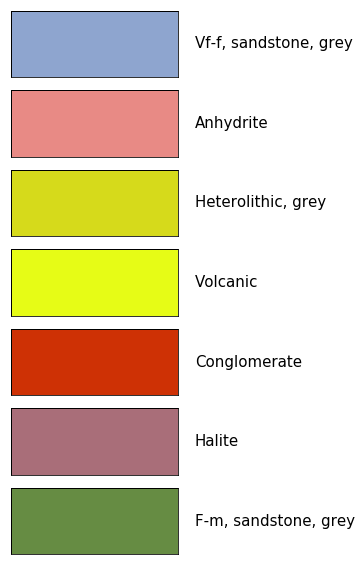

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3, 10))
for i, d in enumerate(l):
    ax = fig.add_subplot(len(l), 1, i+1)
    ax = d.plot(ax=ax)

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>